# パラメータチューニングやってみた

## とりあえずやってみる
- 対象のパラメータ
  - `start_temp`
  - `end_temp`
- グリッドサーチでやってみる

In [1]:
from test import get_scores
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pickle

In [14]:
df = pd.DataFrame()

In [15]:
for start_temp in np.arange(0.1, 3.5, 0.1):
    for end_temp in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.09]:
        scores = get_scores("../dist/sa", start_temp, end_temp)
        df[(start_temp, end_temp)] = scores

/var/folders/4x/vf52k2q52wx0sqrm0t5hfr040000gn/T/ipykernel_27050/3787376343.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(start_temp, end_temp)] = scores
/var/folders/4x/vf52k2q52wx0sqrm0t5hfr040000gn/T/ipykernel_27050/3787376343.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(start_temp, end_temp)] = scores
/var/folders/4x/vf52k2q52wx0sqrm0t5hfr040000gn/T/ipykernel_27050/3787376343.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

In [16]:
df.to_pickle("tuning_res.pkl")

In [17]:
df

,"(0.1, 0.0001)","(0.1, 0.0005)","(0.1, 0.001)","(0.1, 0.005)","(0.1, 0.01)","(0.1, 0.05)","(0.1, 0.09)","(0.2, 0.0001)","(0.2, 0.0005)","(0.2, 0.001)",...,"(3.3000000000000003, 0.01)","(3.3000000000000003, 0.05)","(3.3000000000000003, 0.09)","(3.4000000000000004, 0.0001)","(3.4000000000000004, 0.0005)","(3.4000000000000004, 0.001)","(3.4000000000000004, 0.005)","(3.4000000000000004, 0.01)","(3.4000000000000004, 0.05)","(3.4000000000000004, 0.09)"
0,40.0103,40.0103,40.0103,40.0103,40.0103,40.0103,40.0103,42.0165,42.0165,42.0165,...,40.0458,37.0516,42.0001,40.0268,41.0351,40.0345,41.0070,39.0380,41.0355,44.0022
1,38.0037,38.0037,38.0037,38.0037,38.0037,37.0409,38.0037,36.0256,36.0256,36.0256,...,38.0079,37.0467,36.0531,37.0228,37.0191,38.0270,38.0082,38.0347,36.0590,35.1251
2,40.0789,40.0789,40.0789,40.0789,40.0789,40.0789,40.0789,43.0369,43.0369,43.0369,...,40.0532,39.0005,40.0400,40.0127,42.0503,42.0544,39.0005,40.0507,39.0093,40.0335
3,39.0335,39.0335,39.0335,39.0335,39.0335,39.0335,39.0335,39.0288,39.0288,39.0288,...,38.0323,38.0284,38.0464,39.0016,38.0309,38.0111,37.0464,38.0085,40.0083,38.0197
4,37.0083,36.0661,37.0083,36.0661,36.0661,36.0661,37.0083,36.0357,36.0357,36.0357,...,37.0123,34.0925,36.0385,36.0634,34.0549,36.0263,37.0759,35.0803,35.0861,37.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,34.0148,34.0148,34.0148,34.0148,34.0148,34.0148,34.0148,35.0007,35.0007,35.0007,...,35.0099,37.0477,36.0612,35.0311,36.0045,37.0598,35.0082,33.0894,37.0163,38.0289
496,29.1120,29.1120,29.1120,29.1120,29.1120,29.1120,29.1120,29.1120,29.1120,29.1120,...,34.0464,33.0177,34.0017,33.0173,32.0485,35.0018,31.0005,34.0274,34.0216,33.0270
497,34.0327,34.0327,34.0327,34.0327,34.0327,34.0327,34.0327,34.0350,34.0350,33.0060,...,30.0214,31.0077,32.0460,33.0140,31.0445,30.0360,31.0009,31.0839,32.0142,32.0033
498,41.0263,41.0263,41.0263,41.0263,41.0263,41.0263,42.0123,43.0191,43.0191,43.0191,...,48.0003,46.0007,44.0209,42.0653,44.0089,45.0100,46.0006,45.0393,44.0051,43.0513


In [38]:
df_mean = df.mean(axis=0)
df_mean = df_mean[:238]

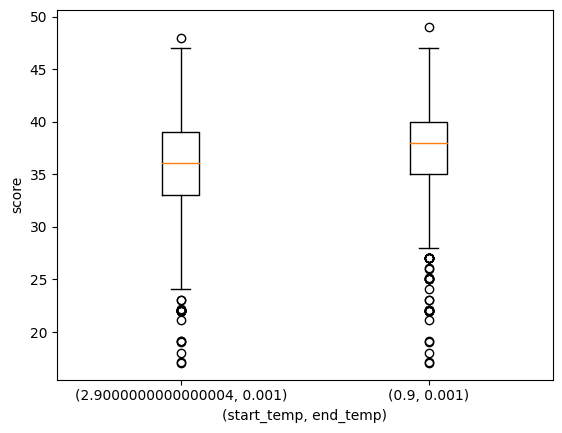

In [39]:
plt.boxplot(df[df_mean.sort_values().index[[0,-1]]])
plt.xlabel("(start_temp, end_temp)")
plt.ylabel("score")
plt.xticks([1,2], df_mean.sort_values().index[[0,-1]])
plt.show()

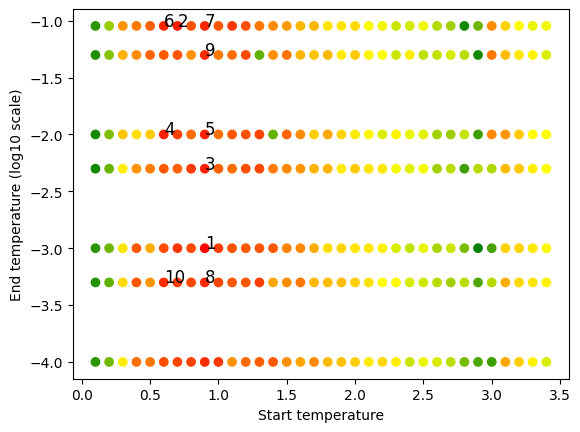

In [40]:
# Define the colormap
cmap = mcolors.LinearSegmentedColormap.from_list("n", ["green", "yellow", "red"])

# Calculate the mean values of 'x' and 'y'
mean_x = df_mean.index.map(lambda x: x[0])
mean_y = np.log10(df_mean.index.map(lambda x: x[1]))

colors = df_mean.values

plt.scatter(mean_x, mean_y, c=colors, cmap=cmap)
plt.xlabel("Start temperature")
plt.ylabel("End temperature (log10 scale)")
for i, (x,y) in enumerate(df_mean.sort_values().index[-10:][::-1]):
    plt.text(x, np.log10(y), f"{i+1}", fontsize=12)
plt.show()


In [41]:
df_mean.sort_values(ascending=False)

(0.9, 0.001)                   36.779330
(0.7000000000000001, 0.09)     36.707157
(0.9, 0.005)                   36.693465
(0.6, 0.01)                    36.689737
(0.9, 0.01)                    36.683320
                                 ...    
(0.1, 0.01)                    35.392320
(2.8000000000000003, 0.09)     35.390850
(2.9000000000000004, 0.05)     35.384419
(0.1, 0.005)                   35.376010
(2.9000000000000004, 0.001)    35.330377
Length: 238, dtype: float64

## 一旦のまとめ
- `start_temp`
  - 高スコアは0.6~0.9に集中している
  - それより低く・高くなるほどスコアが下がる傾向にある
  - しかし3.0でその傾向が一瞬逆転するので、一応大きな値を試してみるべきか？
- `end_temp`
  - 割とスコアがばらつく傾向にある
  - もっと大きな値を試してみるべきか？

## 上の結果を踏まえてさらにやってみる

In [7]:
df = pd.read_pickle("tuning_res.pkl")

In [8]:
for start_temp in np.arange(0.6, 1, 0.01):
    for end_temp in np.arange(0.05, 0.5, 0.01):
        scores = get_scores("../dist/sa", start_temp, end_temp)
        new_df = pd.DataFrame()
        new_df[(start_temp, end_temp)] = scores
        df = pd.concat([df, new_df], axis=1)

KeyboardInterrupt: 

In [9]:
df.to_pickle("tuning_res.pkl")

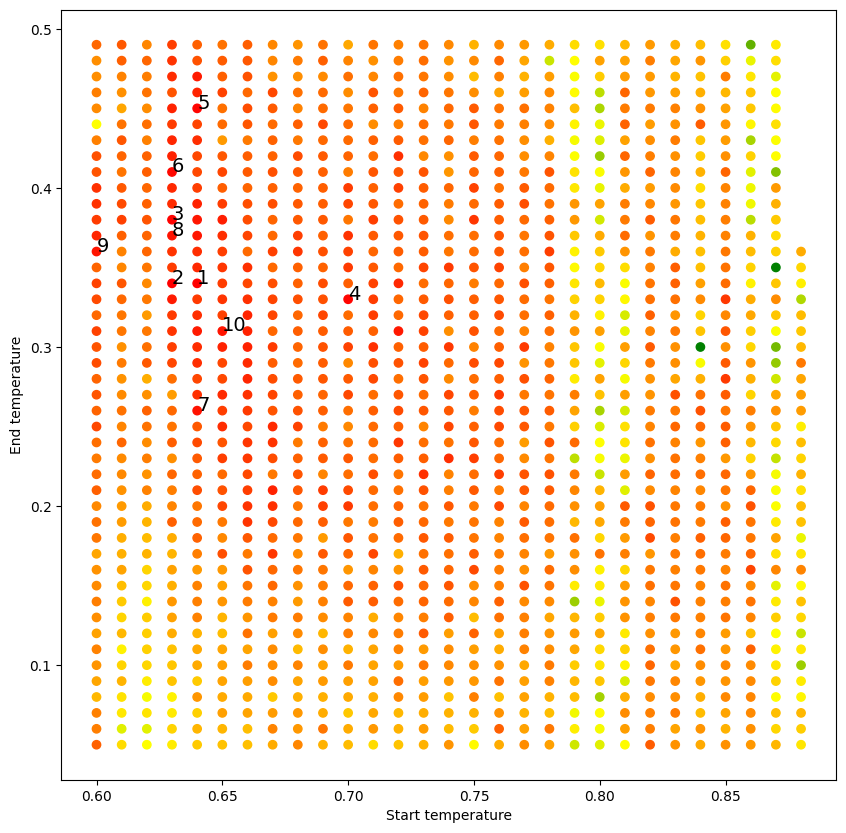

In [43]:
df_mean = df.mean(axis=0)
df_mean = df_mean[238:]
# Define the colormap
cmap = mcolors.LinearSegmentedColormap.from_list("n", ["green", "yellow", "red"])

# Calculate the mean values of 'x' and 'y'
mean_x = df_mean.index.map(lambda x: x[0])
mean_y = df_mean.index.map(lambda x: x[1])

colors = df_mean.values

plt.figure(figsize=(10,10))
plt.scatter(mean_x, mean_y, c=colors, cmap=cmap)
plt.xlabel("Start temperature")
plt.ylabel("End temperature")
for i, (x,y) in enumerate(df_mean.sort_values().index[-10:][::-1]):
    plt.text(x, y, f"{i+1}", fontsize=14)
plt.show()


In [44]:
df_mean.sort_values(ascending=False)

(0.64, 0.34)                                 37.246827
(0.63, 0.34)                                 37.245062
(0.63, 0.38000000000000006)                  37.241111
(0.7000000000000001, 0.33)                   37.237233
(0.64, 0.45000000000000007)                  37.236312
                                               ...    
(0.8700000000000002, 0.4100000000000001)     36.536495
(0.8700000000000002, 0.30000000000000004)    36.509704
(0.8600000000000002, 0.49000000000000005)    36.476701
(0.8700000000000002, 0.35000000000000003)    36.290529
(0.8400000000000002, 0.30000000000000004)    36.289887
Length: 1292, dtype: float64